In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

from Library.sb_utils import save_file

In [2]:
water_test_data = pd.read_csv('../Capstone Project/capstone_data_analysis_df.csv')
water_test_data.head().T

,0,1,2,3,4
station_id,12.0,12.0,12.0,12.0,12.0
latitude_Dissolved,37.8019,37.8019,37.8019,37.8019,37.8019
longitude_Dissolved,-121.6203,-121.6203,-121.6203,-121.6203,-121.6203
county_name,Alameda,Alameda,Alameda,Alameda,Alameda
sample_code,568.0,668.0,768.0,868.0,968.0
sample_depth,1.0,1.0,1.0,1.0,1.0
Dissolved_Oxygen,7.5,7.4,6.7,7.5,7.0
pH,7.6,7.0,7.5,7.7,7.7
Electrical_Conductance,278.0,325.0,438.0,470.0,415.0
Water_Temperature,21.1,24.4,23.3,20.6,21.1


In [3]:
len(water_test_data) * .7, len(water_test_data) * .3

(1108.8, 475.2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(water_test_data
                                                    .drop(columns='Dissolved_Oxygen'), 
                                                    water_test_data.Dissolved_Oxygen, test_size=0.3, 
                                                    random_state=47)

In [5]:
X_train.shape, X_test.shape

((1108, 9), (476, 9))

In [6]:
y_train.shape, y_test.shape

((1108,), (476,))

In [7]:
X_train

,station_id,latitude_Dissolved,longitude_Dissolved,county_name,sample_code,sample_depth,pH,Electrical_Conductance,Water_Temperature
686,80.0,37.07420,-121.01510,Merced,1273.0,1.0,7.40,395.0,10.00
1119,390.0,39.93180,-120.52330,Plumas,973.0,1.0,8.30,95.0,13.30
826,412.0,37.06810,-121.08540,Merced,568.0,1.0,8.00,440.0,16.70
680,80.0,37.07420,-121.01510,Merced,1072.0,1.0,7.80,355.0,18.90
718,81.0,37.11270,-121.05960,Merced,973.0,9.0,8.70,400.0,20.00
...,...,...,...,...,...,...,...,...,...
691,80.0,37.07420,-121.01510,Merced,674.0,1.0,7.50,243.0,20.60
584,217.0,34.55880,-118.62890,Los Angeles,574.0,1.0,9.10,430.0,15.30
1288,47116.0,38.53580,-121.52060,Sacramento,815.0,1.0,7.62,121.0,22.85
327,426.0,39.53120,-121.57930,Butte,1074.0,2.0,7.50,90.0,12.80


In [8]:
names_list = ['county_name', 'sample_code', 'station_id']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((1108, 6), (476, 6))

In [9]:
X_train.dtypes

latitude_Dissolved        float64
longitude_Dissolved       float64
sample_depth              float64
pH                        float64
Electrical_Conductance    float64
Water_Temperature         float64
dtype: object

In [10]:
X_test.dtypes

latitude_Dissolved        float64
longitude_Dissolved       float64
sample_depth              float64
pH                        float64
Electrical_Conductance    float64
Water_Temperature         float64
dtype: object

You have only numeric features in your X now!

In [11]:
train_mean = y_train.mean()
train_mean

9.069837545126354

In [12]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[9.06983755]])

In [13]:
def r_squared(y, ypred):
    
    ybar = np.sum(y) / len(y) 
    sum_sq_tot = np.sum((y - ybar)**2) 
    sum_sq_res = np.sum((y - ypred)**2) 
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [14]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([9.06983755, 9.06983755, 9.06983755, 9.06983755, 9.06983755])

In [15]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([9.06983755, 9.06983755, 9.06983755, 9.06983755, 9.06983755])

In [16]:
r_squared(y_train, y_tr_pred)

0.0

In [17]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.00371371239344942

In [18]:
def mae(y, ypred):
   
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [19]:
mae(y_train, y_tr_pred)

1.484753157215655

In [20]:
mae(y_test, y_te_pred)

1.4675807723811545

In [21]:
def mse(y, ypred):
    
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [22]:
mse(y_train, y_tr_pred)

4.2592254248719525

In [23]:
mse(y_test, y_te_pred)

4.121045136060002

In [24]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([2.06378909, 2.03003575])

In [25]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.00371371239344942)

In [26]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1.484753157215655, 1.4675807723811545)

In [27]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(4.2592254248719525, 4.121045136060002)

In [28]:
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, 0.0)

In [29]:
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.00371371239344942, -3.265028337683804e+29)

In [30]:
r_squared(y_train, y_tr_pred), r_squared(y_tr_pred, y_train)

C:\Users\srzje\AppData\Local\Temp\ipykernel_23184\1878487134.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = 1.0 - sum_sq_res / sum_sq_tot


(0.0, -inf)

In [31]:
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

(-0.00371371239344942, -3.265028337683804e+29)

In [32]:
X_defaults_median = X_train.median()
X_defaults_median

latitude_Dissolved         37.8019
longitude_Dissolved      -121.0646
sample_depth                1.0000
pH                          8.0000
Electrical_Conductance    280.0000
Water_Temperature          17.2000
dtype: float64

In [33]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [34]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [35]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [36]:
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.0, -0.00371371239344942)

In [37]:
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(1.484753157215655, 1.4675807723811545)

In [38]:
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(4.2592254248719525, 4.121045136060002)

In [39]:
X_defaults_mean = X_train.mean()
X_defaults_mean

latitude_Dissolved         37.706858
longitude_Dissolved      -120.650348
sample_depth                5.219765
pH                          8.017356
Electrical_Conductance    254.351492
Water_Temperature          16.709968
dtype: float64

In [40]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [41]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

In [42]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [43]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [44]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.38274305120910357, 0.341869332809019)

In [45]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1.1365207787003406, 1.1143802746436862)

In [46]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(2.629036489969071, 2.702151172620581)

In [47]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [48]:
type(pipe)

sklearn.pipeline.Pipeline

In [49]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [51]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [52]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.38274305120910357, 0.341869332809019)

In [53]:
median_r2

(0.0, -0.00371371239344942)

In [54]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1.1365207787003406, 1.1143802746436862)

In [55]:
median_mae

(1.484753157215655, 1.4675807723811545)

In [56]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(2.629036489969071, 2.702151172620581)

In [57]:
median_mse

(4.2592254248719525, 4.121045136060002)

In [58]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func = f_regression, k='all'),
    LinearRegression()
)

In [59]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001A5BE5C2CA0>)),
                ('linearregression', LinearRegression())])

In [60]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [61]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.38274305120910357, 0.341869332809019)

In [62]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1.1365207787003406, 1.1143802746436862)

In [63]:
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(score_func=f_regression, k='all'),
    LinearRegression()
)

In [64]:
pipe15.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x000001A5BE5C2CA0>)),
                ('linearregression', LinearRegression())])

In [65]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [66]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.38274305120910357, 0.341869332809019)

In [67]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1.1365207787003406, 1.1143802746436862)

In [68]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

In [69]:
cv_scores = cv_results['test_score']
cv_scores

array([0.37503975, 0.40576273, 0.40633795, 0.34358091, 0.02910509])

In [70]:
np.mean(cv_scores), np.std(cv_scores)

(0.3119652861545636, 0.14331223732377998)

In [71]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.03, 0.6 ])

In [72]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

In [73]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [74]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [75]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x000001A5BE5C2CA0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6]})

In [76]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [77]:
lr_grid_cv.best_params_

{'selectkbest__k': 6}

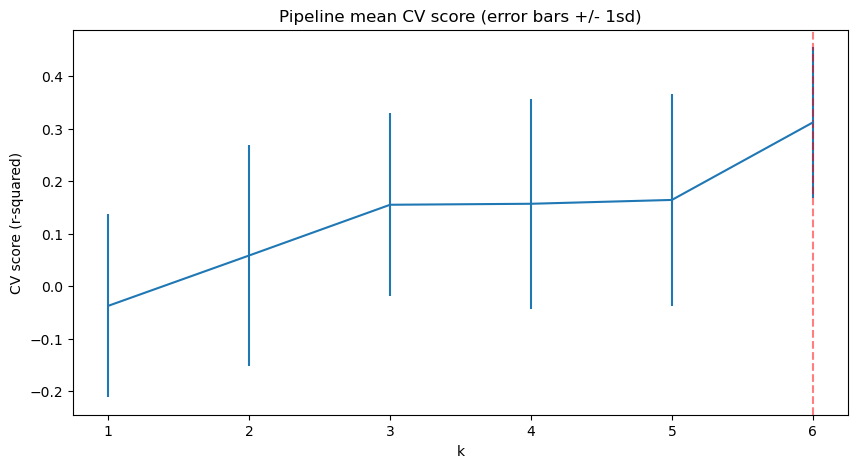

In [78]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [79]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [80]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

pH                        0.509858
sample_depth             -0.532591
Electrical_Conductance   -0.688921
Water_Temperature        -0.879395
longitude_Dissolved      -1.095275
latitude_Dissolved       -1.560430
dtype: float64

In [81]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [82]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [83]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.5311885 , 0.56340473, 0.53512807, 0.66633385, 0.6607637 ])

In [84]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.5913637700664021, 0.06000347920685303)

In [85]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [86]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [87]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [88]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [89]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.53102368, 0.57341774, 0.53598861, 0.65886944, 0.66950395])

In [90]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.5937606850728029, 0.059436643021267464)

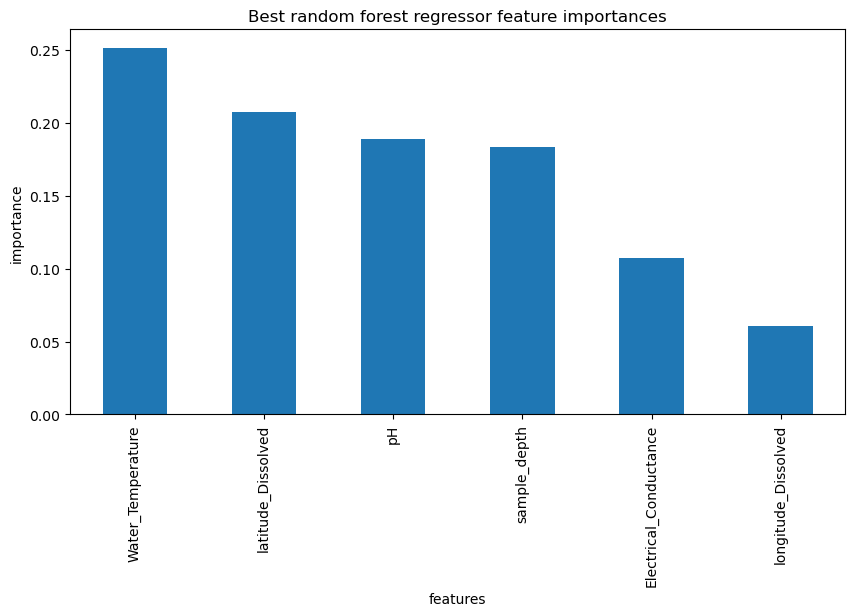

In [92]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [93]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [94]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(1.1479325645795584, 0.05996737270806177)

In [95]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

1.1143802746436862

In [96]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [97]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(0.9025457470359429, 0.08433236957525851)

In [98]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.8594068132303428

In [99]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

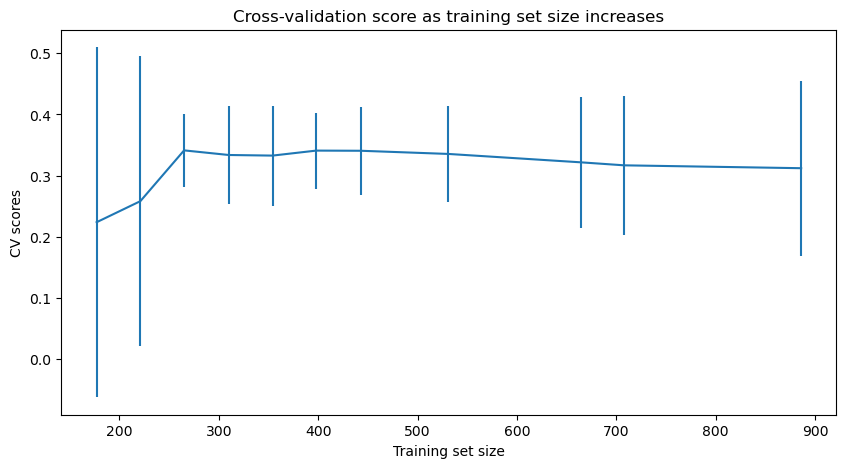

In [100]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

In [101]:
best_model = rf_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version =pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [102]:
modelpath = '../Model'
save_file(best_model, 'water_test_result_model.pkl', modelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../Model\water_test_result_model.pkl"
